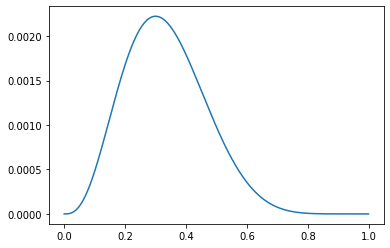

In [1]:
import numpy as np
import matplotlib.pyplot as plt
theta = np.arange(0, 1, 0.001)
p = theta ** 3 * (1 - theta) ** 7
plt.plot(theta, p)
plt.show()

### 모수란?
- __통계적 모델링은 적절한 가정 위에서 확률분포를 추정(inference)__ 하는 것이 목표이며, 기계학습과 통계학이 공통적으로 추구하는목표이다.
- 그러나 유한한 개수의 데이터만 관찰해서 모집단의 분포를 정확하게 알아내는 것은 불가능하며, __근사적으로 확률분포를 추정__ 할 수 밖에 없다.
- 데이터가 특정 확률분포를 따른다고 선험적으로 (a priori) 가정한 후 그 분포를 결정하는 모수(parameter)를 추정하는 방법을 __모수적(parametric)방법론__ 이라고 한다.
- 특정 확률분포를 가정하지 않고 데이터에 따라 모델의 구조 및 모수의 개수가 유연하게 바뀌면 __비모수(nonparametric) 방법론__ 이라 부른다.

### 확률분포 가정하기 : 예제
확률분포를 가정하는 방법 : 히트로그램을 통해 모양을 관찰한다.
- 데이터가 2개의값(0 또는 1)만 가지는 경우 > 베르누이 분포
- 데이터가 n개의 이산적인 값을 가지는 경우 > 카테고리 분포
- 데이터가 [0,1] 사이에서 값을 가지는 경우 > 베타분포
- 데이터가 0개이상의 값을 가지는 경우 > 감마분포, 로그정규분포 등
- 데이터가 $R$ 전체에서 값을 가지는 경우 > 정규분포, 라플라스 분포 등

- 기계적으로 확률분포를 가정해선 안되며, __데이터를 생성하는 원리를 먼저 고려하는 것이 원칙__ 이다.(각 분포마다 검정하는 방법들이 있으므로 모수를 추정한 후에는 반드시 검정을 해야 한다.)

### 데이터로 모수 추정해보기
- 데이터의 확률분포를 가정했다면 모수를 추정할 수 있다.
- 정규분포의 모수는 평균 $\mu$과 분산 $\sigma^2$으로 이를 추정하는 통계량(statistic)은 다음과 같다.
- 표본분산을 구할 때 $N$이 아닌 $N$-1로 나누는 이유는 불편(unbiased)추정량을 구하기 위해서다.

<img src = "../../images/ai_20.gif" width = 600>

- __통계량의 확률분포를 표집분포(sampling distribution)__ 라 부르며 특히 표본평균의 표집분포는 $N$이 커질수록(데이터가 클수록) 정규분포 $N(\mu, \sigma^2/N$)를 따른다. 이를 __중심극한정리(Central Limit Theorem)__ 이라 부르며, 모집단의 분포가 정규분포를 따르지 않아도 성립한다.


### 최대가능도 추정법
- 표본평균이나 표본분산은 중요한 통계량이지만 확률분포마다 사용하는 모수가 다르므로 적절한 통계량이 달라지게 된다.
- 이론적으로 가장 가능성이 높은 모수를 추정하는 방법중 하나는 __최대가능도추정법(maximum likelihood estimation, MLE)이다.
- 가능도(likelihood)함수는 모수 $\theta$를 따르는 분포가 $x$를 관찰할 가능성을 뜻하지만 확률로 해석하면 안된다

$$ \hat\theta_{MLE} = \arg \max_\theta L(\theta;x) = \arg \max_\theta P(x|\theta) $$
주어진 데이터 $x$에 대해서모수 $\theta$를 변수로 둔 함수, 즉 데이터가 주어진 상황에서 $\theta$를 변형시킴에 따라 값이변하는 함수

- 데이터 집합 $X$가 __독립적으로 추출되었을 경우 로그가능도를 최적화__ 한다.
$$ L(\theta;x) = \displaystyle\prod_{i=1}^n P(x_i|\theta) \Rightarrow log L(\theta;x) = \displaystyle\prod_{i=1}^n P(x_i|\theta) $$

### 왜 로그 가능도를 사용하는가?
- 로그가능도를 최적화하는 모수 $\theta$는 가능도를 최적화하는 MLE가 된다.
- 데이터의 숫자가 적으면 상관없지만 __만일 데이터의 숫자가 수억 단위가 된다면 컴퓨터의 정확도로는 가능도를 계산하는 것은 불가능__ 하다.
- 데이터가 독립일 경우, 로그를 사용하면 가능도의 곱셈을 로그가능도의 덧셈으로 바꿀 수 있기 때문에 컴퓨터 연산이 가능하다.
- 경사하강법으로 가능도를 최적화 할 때 미분 연산을 사용하게 되는데, 로그 가능도를 사용하면 __연산량을 $O(n^2)$ 에서 $O(n)$으로 줄여준다.__
- 대게의 손실함수의 경우 경사하강법을 사용하므로 __음의 로그가능도(negative log-likelihood)를 최적화__ 하게 된다.

### 최대가능도 추정법 예제 : 정규분포
- 정규분포를 따르는 확률변수 $X$로부터 독립적인 표본 {$x_1,...,x_n$}을 얻었을 때 최대가능도 추정법을 이용하여 모수를 추정하면?

<img src = "../../images/ai_21.png" width = 600>

<img src = "../../images/ai_22.png" width = 600>

### 최대가능도 추정법 예제 : 카테고리 분포
- 카테고리분포 Multinoulli($x;p_1,...,p_d$)를 따르는 확률변수 $X$로부터 독립적인 표본 {$x_1,...,x_n$}을 얻었을 때 최대가능도추정법을 이용하여 모수를 추정하면?

<img src = "../../images/ai_23.png" width = 600>

<img src = "../../images/ai_24.png" width = 600>

<img src = "../../images/ai_25.png" width = 600>

### 딥러닝에서 최대가능도 추정법
- 최대가능도 추정법을 이용해서 기계학습 모델을 학습할 수 있다.
- 딥러닝 모델의 가중치를 $\theta$ = ($W^{(1)},...,W^{(L)}$)라 표기했을 때 분류 문제에서 소프트맥스 벡터는 카테고리분포의 모수 ($p_1,...,p_k$)를 모델링한다.
- 원핫벡터로 표현한 정답레이블 $y$=($y_1,...,y_k$)를 관찰데이터로 이용해 확률분포인 소프트맥스 벡터의 로그가능도를 최적화 할 수 있다.
- __아래 수식을 잘 기억해 두자__

$$ \hat\theta_{MLE} = arg \max_\theta\frac{1}{n}\displaystyle\sum_{n=1}^n\displaystyle\sum_{k=1}^K y_{i,k}log(MLP_\theta(x_i)_k)$$

### 확률분포의 거리를 구해보자
- 기계학습에서 사용되는 손실함수들은 모델이 학습하는 확률분포와 데이터에서 관찰되는 확률분포의 거리를 통해 유도한다.  

데이터 공간에 두 개의 확률분포 $P(x),Q(x)$가 있을 경우 __두 확률분포 사이의 거리(distance)__ 를 계산할 때 다음과 같은 함수들을 이용한다.
- 총변동거리(Total Variation Distance, TV)
- 쿨백-라이블러 발산(Kullback-Leibler Divergence, KL)
- 바슈타인 거리(Wasserstein Distance)

### 쿨백-라이블러 발산
- 쿨백-라이블러 발산(KL Divergence)은 다음과 같이 정의한다.
<img src = "../../images/ai_26.png" width = 600>

- 쿨백 라이블러는 다음과 같이 분해할 수 있다.
<img src = "../../images/ai_27.png" >

- 분류 문제에서 정답레이블을 $P$, 모델 예측을 $Q$라 두면 __최대가능도 추정법은 쿨백-라이블러 발산을 최소화__ 하는것과 같다.